#  3th Session - 1st HW

## 1. LAB 1 따라해보기

### 1) Gaussian Naive Bayes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

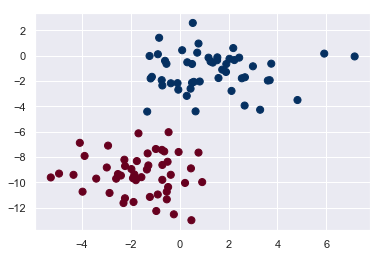

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [4]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

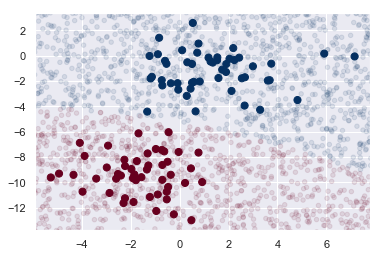

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [6]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### 2) Multinomial Naive Bayes

분류하기

In [7]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

comp.graphics , rec.autos, talk.politics.gun, sci.med라는 네 개의 카테고리를 뽑았다

In [8]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [9]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Multinomial naive Bayes classifier에 있어서 Pipeline 설계하기

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Training data에 적용해 만든 모델을 이용해 test data에 대한 것들을 예측한다.

In [11]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

실제 데이터 & test data를 이용한 예측값 사이에서 만들어진 confusion matrix(분류 모델이 정확한지 평가할때 활용할 수 있는 오차행렬)

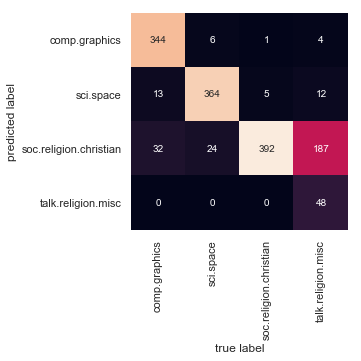

In [12]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

String 형태에 대한 category를 결정하는 도구

In [13]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
### try
predict_category('sending a payload to the ISS')
predict_category('discussing islam vs atheism')
predict_category('determining the screen resolution')

'comp.graphics'

## 2. Multinomial Naive Bayes Classifier

In [14]:
import pandas as pd

In [15]:
wine = pd.read_csv("Wine.csv", header=None)

In [16]:
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.750000,1.25,3.17,1510


변수 이름을 features를 참고해서 바꿔주어야 한다 (target : class)

In [17]:
wine.columns=["class","alc","malic","ash","alc_of_ash","mag","to_phe","fla","nonfla","pro","col","hue","dilu","proline"]
wine.head()

,class,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


### 데이터 전처리

In [18]:
wine.shape

(177, 14)

In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
class         177 non-null int64
alc           177 non-null float64
malic         177 non-null float64
ash           177 non-null float64
alc_of_ash    177 non-null float64
mag           177 non-null int64
to_phe        177 non-null float64
fla           177 non-null float64
nonfla        177 non-null float64
pro           177 non-null float64
col           177 non-null float64
hue           177 non-null float64
dilu          177 non-null float64
proline       177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.4 KB


177개의 data와 13개의 변수, class는 총 3개(1, 2, 3)이다.
class 변수를 제외한 나머지 변수들은 모두 float type이고, class 변수는 integer type으로 맞춰져있다.

In [20]:
wine.isnull().sum()

class         0
alc           0
malic         0
ash           0
alc_of_ash    0
mag           0
to_phe        0
fla           0
nonfla        0
pro           0
col           0
hue           0
dilu          0
proline       0
dtype: int64

NA 역시 존재하지 않으므로 이 데이터를 토대로 그대로 분석을 진행할 수 있다.

In [21]:
wine.describe()

,class,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


그 외의 정보들이 여기 수록되어 있다.

시각화를 통한 정보 확인

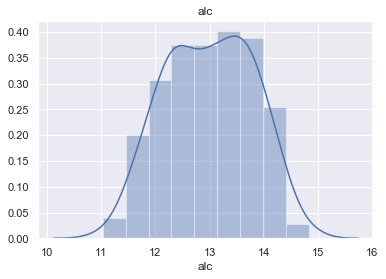

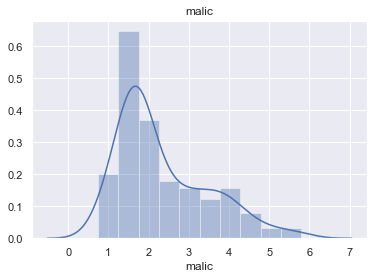

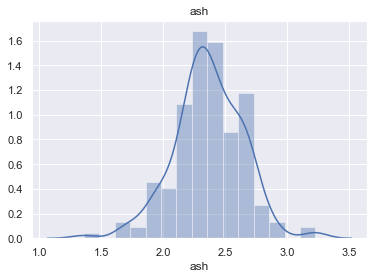

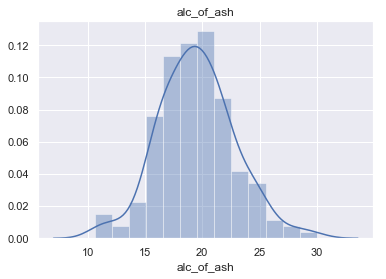

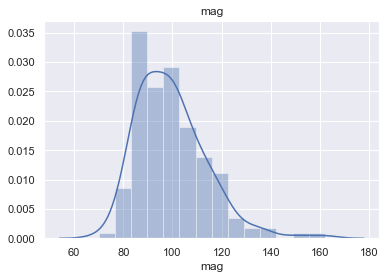

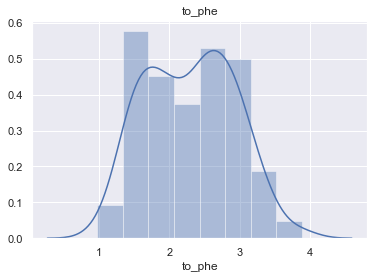

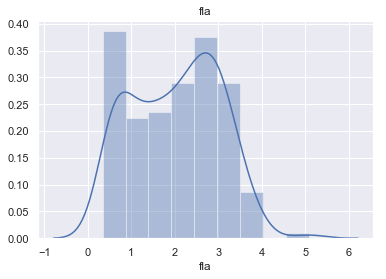

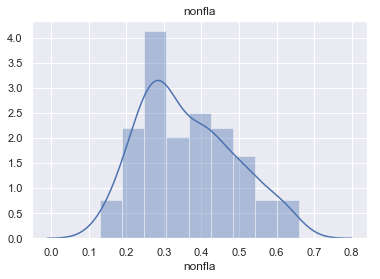

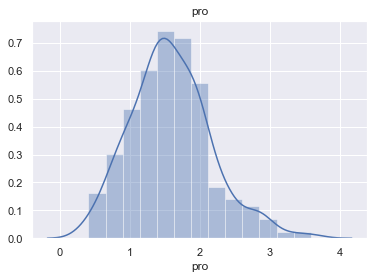

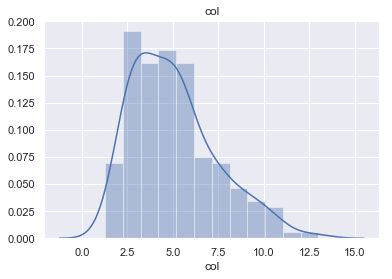

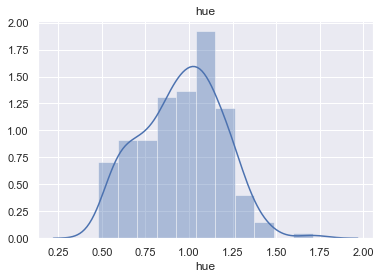

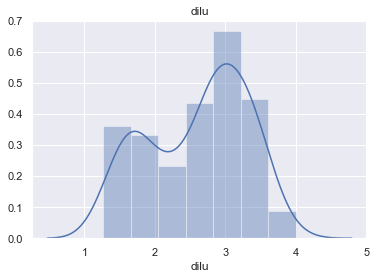

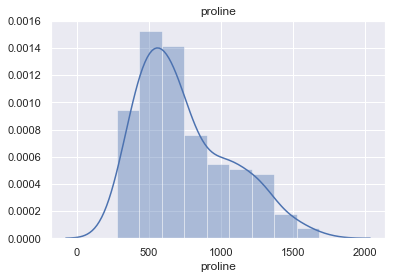

In [22]:
for col in wine.columns[1:]:
    sns.distplot(wine[col])
    plt.title(col)
    plt.show()

malic. nonfla, col, proline, mag가 약간 왜도를 가지기 때문에 이 왜도를 보정하고자 log 변환을 이용해 왜도를 최대한 없앨 것이다.

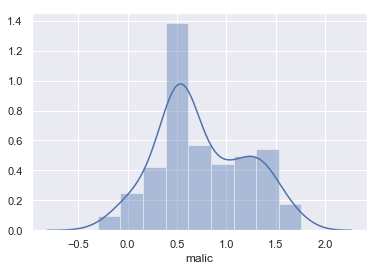

In [23]:
wine["malic"]=np.log(wine.loc[:,"malic"])
sns.distplot(wine["malic"])

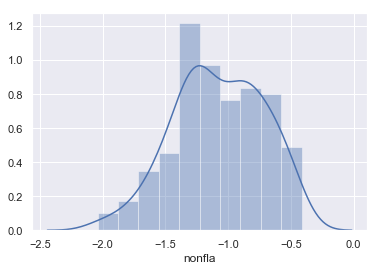

In [24]:
wine["nonfla"]=np.log(wine.loc[:,"nonfla"])
sns.distplot(wine["nonfla"])

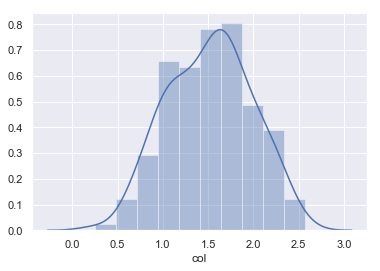

In [25]:
wine["col"]=np.log(wine.loc[:,"col"])
sns.distplot(wine["col"])

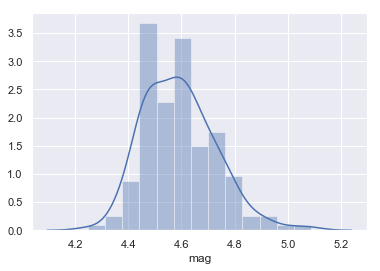

In [26]:
wine["mag"]=np.log(wine.loc[:,"mag"])
sns.distplot(wine["mag"])

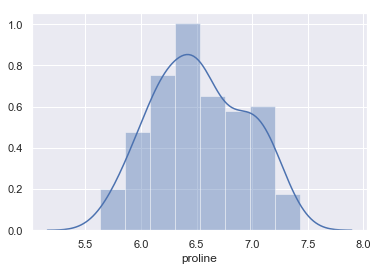

In [27]:
wine["proline"]=np.log(wine.loc[:,"proline"])
sns.distplot(wine["proline"])

변수간의 상관관계를 보자!

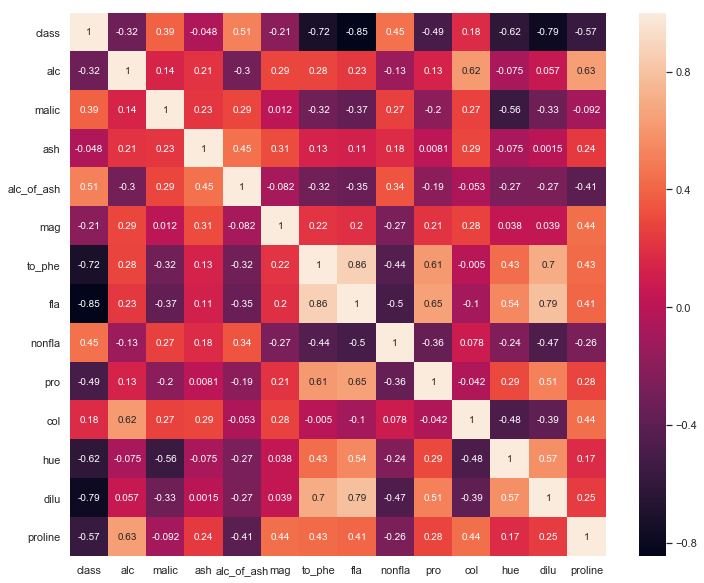

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(wine.corr(),annot=True)

In [29]:
wine.corr()[abs(wine.corr())>=0.7].sum()

class        -1.350846
alc           1.000000
malic         1.000000
ash           1.000000
alc_of_ash    1.000000
mag           1.000000
to_phe        1.146113
fla           1.803932
nonfla        1.000000
pro           1.000000
col           1.000000
hue           1.000000
dilu          0.999944
proline       1.000000
dtype: float64

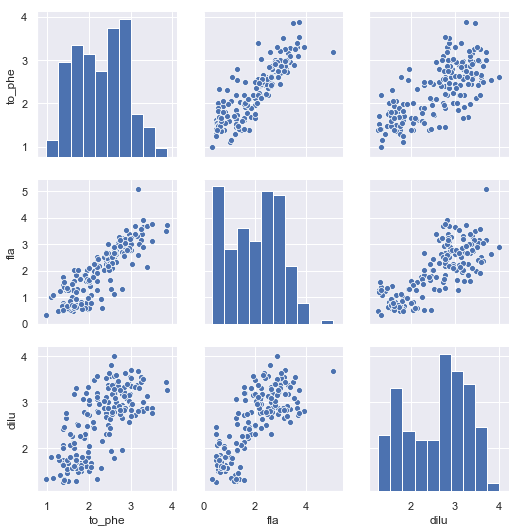

In [30]:
sns.pairplot(wine[['to_phe', 'fla',  'dilu']])

세 변수 to_phe, fla, dilu의 산점도에서 강한 양의 상관관계가 있는 것을 볼 수 있다. 즉, 다중공선성이 성립한다고 할 수 있으며, 세 변수 중 class 변수와 correlation이 가장 높은 fla를 제외한 나머지는 삭제하는 것이 좋다.

In [31]:
del wine['to_phe']
del wine['dilu']

In [32]:
(abs(wine.corr())>0.7).sum()

class         2
alc           1
malic         1
ash           1
alc_of_ash    1
mag           1
fla           2
nonfla        1
pro           1
col           1
hue           1
proline       1
dtype: int64

class 변수와의 상관관계 및 class 변수와 fla의 상관관계로 인해 2로 집계된 것들을 제외하고는 사실상 0.7보다 상관관계가 높은 것이 없으므로 이대로 분석을 진행할 수 있다. 

### train & test set 나누기

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_tra, X_te, Y_tra, Y_te = train_test_split(wine.iloc[:, 0:11], wine['class'], test_size=0.3, random_state= 730)

In [35]:
print(X_tra.shape); print(Y_tra.shape);
print(X_te.shape); print(Y_te.shape)

(123, 11)
(123,)
(54, 11)
(54,)


가장 이상적인 형태라고 할 수 있는 Train set 70%, Test set 30%의 비율로 나누었다고 할 수 있다.

### Test set에 다음의 모델을 fit 해보기

### LDA

선형판별분석(LDA, Linear Discriminant analysis) : 독립변수 x의 조건부 확률분포가 공통된 공분산 행렬을 가지는 다변수 정규분포라고 가정
& 직선으로 분류

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error as mse

In [37]:
Lda = LinearDiscriminantAnalysis().fit(X_tra, Y_tra)
Lda_tra_mse = mse(Y_tra, Lda.predict(X_tra))
Lda_te_mse = mse(Y_te, Lda.predict(X_te))
print("LDA train mse :", Lda_tra_mse);
print("LDA test mse :", Lda_te_mse);

LDA train mse : 0.008130081300813009
LDA test mse : 0.037037037037037035


C:\Users\JIC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [38]:
print("LDA train score:",sum(Y_tra == Lda.predict(X_tra))/len(Y_tra));
print("LDA test score:",sum(Y_te == Lda.predict(X_te))/len(Y_te));

LDA train score: 0.991869918699187
LDA test score: 0.9629629629629629


### QDA

이차판별분석(QDA, Quadratic Discriminant analysis) : 독립 변수 x는 실수이고 확률분포가 다변수 정규분포라고 가정 & 직선으로 분류되지 않음.

In [39]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [40]:
Qda = LinearDiscriminantAnalysis().fit(X_tra, Y_tra)
Qda_tra_mse = mse(Y_tra, Qda.predict(X_tra))
Qda_te_mse = mse(Y_te, Qda.predict(X_te))
print("QDA train mse :", Qda_tra_mse);
print("QDA test mse :", Qda_te_mse);

QDA train mse : 0.008130081300813009
QDA test mse : 0.037037037037037035


C:\Users\JIC\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [41]:
print("QDA train score:",sum(Y_tra == Qda.predict(X_tra))/len(Y_tra));
print("QDA test score:",sum(Y_te == Qda.predict(X_te))/len(Y_te));

QDA train score: 0.991869918699187
QDA test score: 0.9629629629629629


### Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
Logi_reg = LogisticRegression(solver = 'sag', max_iter= 10000, multi_class= "auto")
Logi = Logi_reg.fit(X_tra,Y_tra)
Logi_tra_mse = mse(Y_tra, Logi.predict(X_tra))
Logi_te_mse = mse(Y_te, Logi.predict(X_te))
print("Logistic train mse:", Logi_tra_mse); 
print("Logistic test mse:", Logi_te_mse)

Logistic train mse: 0.0
Logistic test mse: 0.0


In [44]:
Logi_tra_score = sum(Y_tra == Logi.predict(X_tra))/len(Y_tra)
Logi_te_score = sum(Y_te == Logi.predict(X_te))/len(Y_te)

print("Logistic train score:",Logi_tra_score);
print("Logistic test score:",Logi_te_score);

Logistic train score: 1.0
Logistic test score: 1.0


###  Logistic Regression with feature expansion by KCV with 차수

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import math

In [46]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
log = LogisticRegression(solver = 'sag', max_iter= 10000, multi_class= "auto")

for i in range(1,4):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_tra_poly = poly.fit_transform(X_tra)
    X_te_poly = poly.fit_transform(X_te)
    Logistic2 = log.fit(X_tra_poly, Y_tra.values.ravel())
    print('degree', i, ':', Logistic2.score(X_tra_poly, Y_tra.values.ravel()), Logistic2.score(X_te_poly, Y_te.values.ravel()))

degree 1 : 1.0 1.0
degree 2 : 1.0 1.0
degree 3 : 1.0 1.0


차수에 따른 score 값이 차이가 없으므로 그냥 1차로 이용하려고 한다.

### 각 모델에 대해 Test MSE 보고하고 결과 해석하기

In [47]:
print("LDA test mse :", Lda_te_mse);
print("QDA test mse :", Qda_te_mse);
print("Logistic test mse:", Logi_te_mse)

LDA test mse : 0.037037037037037035
QDA test mse : 0.037037037037037035
Logistic test mse: 0.0


In [48]:
print("LDA test score:",sum(Y_te == Lda.predict(X_te))/len(Y_te));
print("QDA test score:",sum(Y_te == Qda.predict(X_te))/len(Y_te));
print("Logistic test score:",Logi_te_score);

LDA test score: 0.9629629629629629
QDA test score: 0.9629629629629629
Logistic test score: 1.0


test MSE 3개 중에서 가장 낮은 방법인 Logistic 방법을 선택할 수 있다.